# Template

Copy-paste this directory and change the input data were needed.

All files must be in same folder.

This folder should contain:

- Flow data (in a `.txt`) for sample and blank 
- Mass spec data (in a `.csv`) for sample and blank
- `template.ipynb`

## Importing all packages

In [14]:
import os
import sys
import copy

import pandas as pd

import seaborn as sns

from AdsorptionBreakthroughAnalysis import ExperimentalSetup, experiment_analysis
from AdsorptionBreakthroughAnalysis.breakthrough_analysis import standard_output

%load_ext autoreload
%autoreload 2

# below is just to make the output clearer
pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1. Input data

Input blank data data

In [2]:
ExperimentalSetup["breakthrough_start"] = 3600 * 0 + 60 * 45 + 30
ExperimentalSetup["breakthrough_end"] = 3600 * 1 + 60 * 4 + 30
ExperimentalSetup["LowConcCo2"] = False
ExperimentalSetup["Coriolis_start"] = 70
coriolis_file_name = "220819-ZIF-8-dry-22%and60%40C20220819134938.txt"
MS_file_name = "220819ZIF8Blank22and60%CO2at40C.csv"

BreakThroughObject_blank = experiment_analysis(
    coriolis_file_name=coriolis_file_name,
    MS_file_name=MS_file_name,
    conditions=copy.deepcopy(ExperimentalSetup),
)

updated code used, RS are: 0.12632769517865008 0.96 1.3311861273413064


<Axes: xlabel='Time [s]', ylabel='y(t)Q(t)/yinQin CO2'>

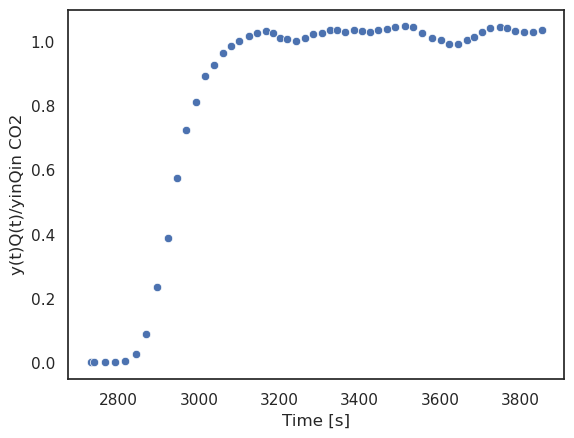

In [17]:
breakthrough_blank_df = BreakThroughObject_blank.get_breakthrough()

sns.scatterplot(
    data = breakthrough_blank_df,
    x = "Time [s]",
    y = "y(t)Q(t)/yinQin CO2",
)

Input sample data

In [3]:
ExperimentalSetup["T_exp"] = 313
ExperimentalSetup["breakthrough_start"] = 3600 * 5 + 60 * 1 + 40
ExperimentalSetup["breakthrough_end"] = 3600 * 5 + 60 * 23 + 10
ExperimentalSetup["LowConcCo2"] = False
ExperimentalSetup["Coriolis_start"] = 30
coriolis_file_name = "220824-ZIF-8-4and22%at40C.txt"
MS_file_name = "220824-ZIF-8-4and22%at40C.csv"

BreakThroughObject = experiment_analysis(
    coriolis_file_name=coriolis_file_name,
    MS_file_name=MS_file_name,
    conditions=copy.deepcopy(ExperimentalSetup),
)

Obeserve breakthrough (without blank)

updated code used, RS are: 0.09816382747224416 0.96 2.3202364477884814
CO2 discontinuity at time  18449.78  where an intermediate RS of  0.9972692194147496  divided all previous points
CO2 discontinuity at time  18449.78  where an intermediate RS of  1.0  divided all previous points


<Axes: xlabel='Time [s]', ylabel='y(t)Q(t)/yinQin CO2'>

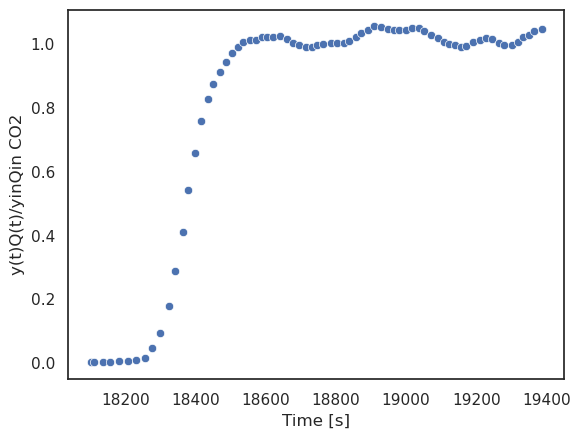

In [16]:
breakthrough_df = BreakThroughObject.get_breakthrough()

sns.scatterplot(
    data = breakthrough_df,
    x = "Time [s]",
    y = "y(t)Q(t)/yinQin CO2",
)

updated code used, RS are: 0.09816382747224416 0.96 2.3202364477884814
CO2 discontinuity at time  18449.78  where an intermediate RS of  0.9972692194147496  divided all previous points
CO2 discontinuity at time  18449.78  where an intermediate RS of  1.0  divided all previous points
updated code used, RS are: 0.12632769517865008 0.96 1.3311861273413064
Below are the CO2 adsorptions for blank and sample: 
CO2 adsorbed by the blank was:  1.1637918889371581  mmol/g
CO2 adsorbed by the sample was:  1.6648259850700993  mmol/g

This gives a capture capacity of:  0.5010340961329411  mmol/g

Selectivity (x_CO2 * y_CO2 / x_N2 * y_N2) of:  0.32


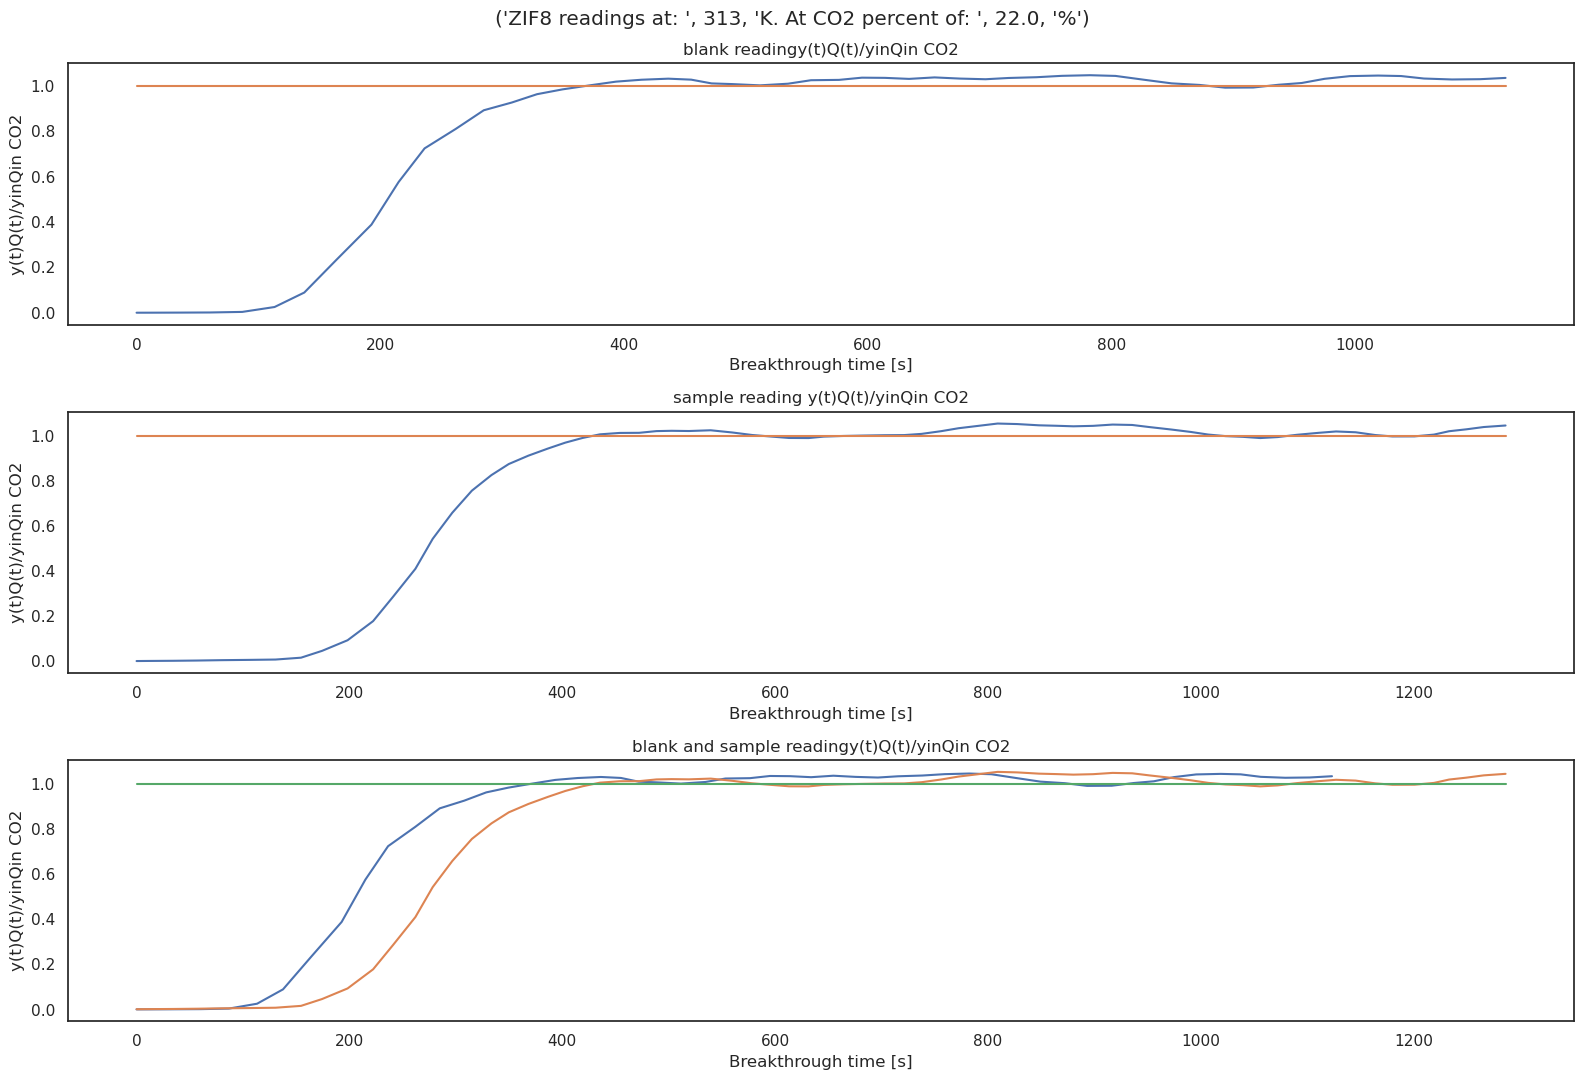

In [4]:
material_name = "ZIF8"
export_file_name = "processed_22%_CO2_dry_ZIF8"
whether_to_export = False  # this is equal to false as I dont want the processed data to be exported

standard_output(
    sample_object=BreakThroughObject,
    blank_object=BreakThroughObject_blank,
    export_file_name=export_file_name,
    material_name=material_name,
    whether_to_export=whether_to_export,
)

Correct size of plot

Below are the CO2 adsorptions for blank and sample: 
CO2 adsorbed by the blank was:  1.1637918889371581  mmol/g
CO2 adsorbed by the sample was:  1.6648259850700993  mmol/g

This gives a capture capacity of:  0.5010340961329411  mmol/g

Selectivity (x_CO2 * y_CO2 / x_N2 * y_N2) of:  0.32


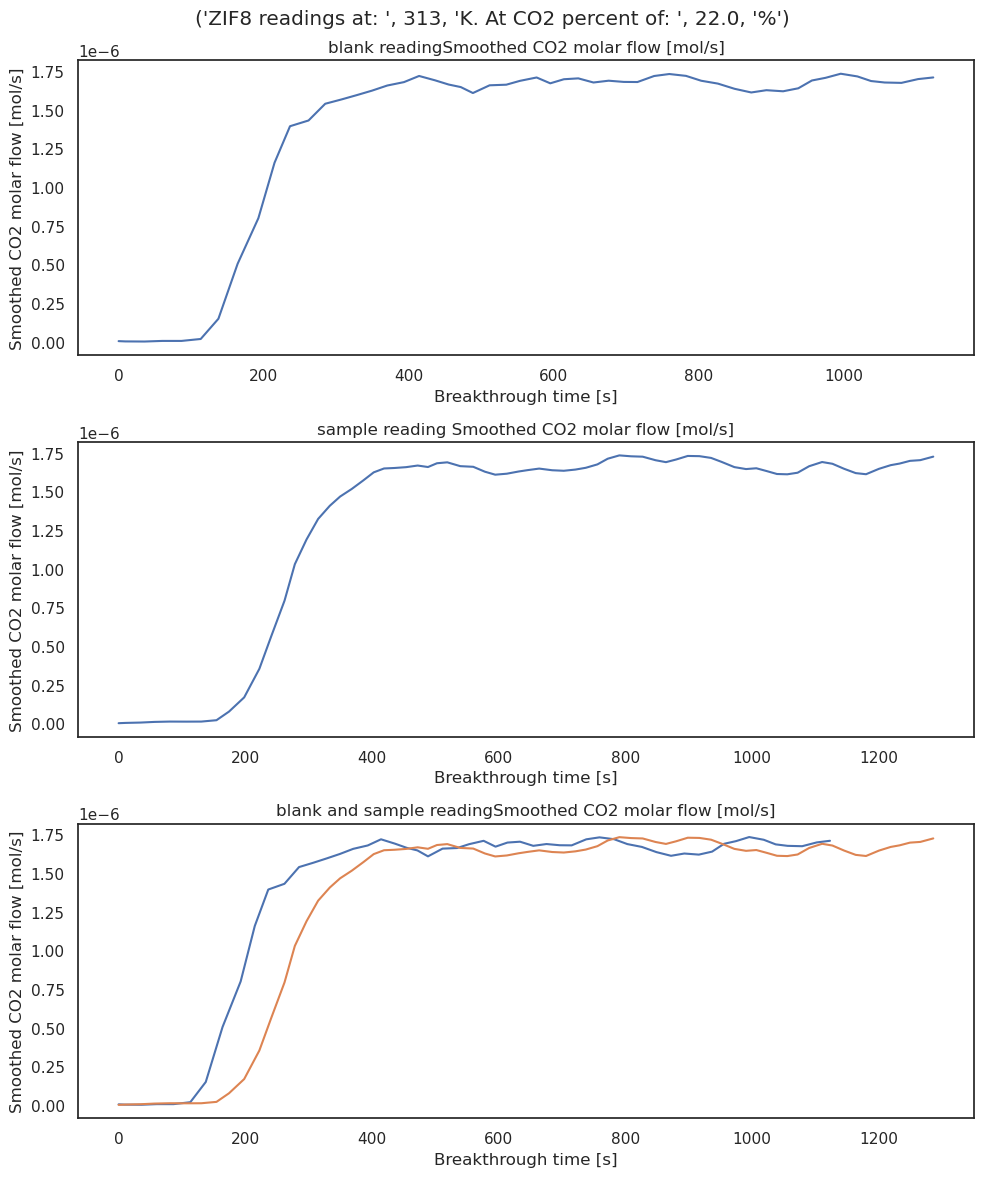

In [5]:
standard_output(
    y_axis="Smoothed CO2 molar flow [mol/s]",
    width=10,
    height=12,
    sample_object=BreakThroughObject,
    blank_object=BreakThroughObject_blank,
    export_file_name=export_file_name,
    material_name=material_name,
    whether_to_export=whether_to_export,
)

# Other key data

In [6]:
BreakThroughObject.sorted_data

,H2O pressure [torr],CO2 pressure [torr],O2 pressure [torr],He pressure [torr],N2 pressure [torr],Unnamed: 7,Time [s],Interpolated CO2 flow [%],Interpolated N2 flow [%],Interpolated He flow [%],...,Smoothed Normalised N2 concentration [mol/m3],Smoothed Normalised He concentration [mol/m3],Smoothed Normalised H2O concentration [mol/m3],Q(t),yinQin CO2,y(t) CO2,y(t)Q(t)/yinQin CO2,yinQin N2,y(t) N2,y(t)Q(t)/yinQin N2
0,-4.444540e-12,-8.997790e-13,7.221030e-12,1.215490e-07,4.198990e-13,NaN,18100.000,2.196875,7.798500,14.18125,...,0.000000,0,0,22.816268,2.198796,0.000236,0.001434,7.795014,0.000000,0.000000
1,8.594430e-13,2.509920e-12,-4.342900e-12,1.213130e-07,2.033190e-12,NaN,18110.692,2.203125,7.800063,14.18437,...,0.000000,0,0,5.834410,2.198796,0.000159,0.001834,7.794217,0.000000,0.000000
2,-8.152330e-12,1.120780e-12,-2.980920e-12,1.216290e-07,8.331600e-12,NaN,18134.668,2.203125,7.796875,14.18125,...,0.000000,0,0,12.998894,2.199577,0.000342,0.002567,7.793124,0.000000,0.000000
3,3.437770e-12,3.709640e-12,-3.726150e-12,1.217070e-07,-6.210090e-12,NaN,18156.542,2.200000,7.794125,14.18437,...,0.000000,0,0,19.579295,2.201139,0.000604,0.003646,7.791937,0.000000,0.000000
4,-7.121100e-13,5.114560e-12,-3.931730e-12,1.211160e-07,-8.839990e-13,NaN,18180.518,2.203125,7.793750,14.18125,...,0.000000,0,0,24.142529,2.200358,0.000616,0.005361,7.791328,0.000000,0.000106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,4.174430e-13,5.457430e-10,-3.597660e-13,1.275880e-07,1.964130e-08,NaN,19319.168,2.206250,7.802250,14.18125,...,0.344100,0,0,30.986860,2.199702,0.072125,1.005691,7.793702,0.268359,1.071619
67,-1.080430e-12,5.182760e-10,1.798830e-12,1.273110e-07,1.973520e-08,NaN,19333.360,2.199375,7.796875,14.18125,...,0.344010,0,0,31.146543,2.198984,0.072682,1.020611,7.794139,0.268311,1.068970
68,4.174430e-12,5.311100e-10,4.368590e-12,1.273510e-07,1.982360e-08,NaN,19349.656,2.197250,7.798625,14.18125,...,0.344075,0,0,30.989820,2.198734,0.073629,1.029104,7.795170,0.268376,1.065801
69,8.422440e-12,5.504630e-10,6.578590e-12,1.266410e-07,1.977940e-08,NaN,19365.952,2.196875,7.800000,14.18125,...,0.343658,0,0,30.729986,2.196391,0.073845,1.039240,7.793827,0.268103,1.064351


In [7]:
BreakThroughObject.loading_data

(['Mass based loading (mg/g sample)',
  {'CO2': 1.6648259850700993,
   'N2': 3.963123516603717,
   'He': -69.77251953296631,
   'H2O': 0.0}],
 ['Volume based loading (mmol/g sample)',
  {'CO2': 63.3674158292646, 'N2': 192.9045162433856, 'He': -0.0, 'H2O': -0.0}])

In [8]:
BreakThroughObject.calculate_loading(integration_end=480)

(['Mass based loading (mg/g sample)',
  {'CO2': 1.7405661938855128,
   'N2': 4.968874310660447,
   'He': -32.05470559625478,
   'H2O': 0.0}],
 ['Volume based loading (mmol/g sample)',
  {'CO2': 63.847338865123255,
   'N2': 189.14833173448133,
   'He': -0.0,
   'H2O': -0.0}])

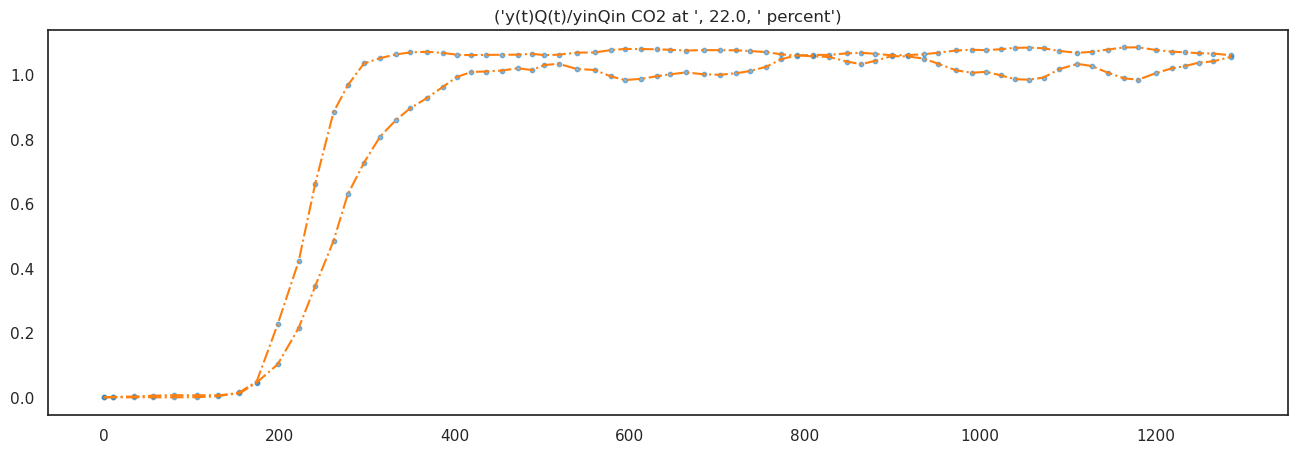

In [9]:
BreakThroughObject.plot(
    Columns_plotted=[
        "Smoothed Normalised CO2 molar flow [mol/s]",
        "Smoothed Normalised N2 molar flow [mol/s]",
    ]
)

In [10]:
# BreakthroughObject.export_data(fileName='processed_22%CO2_ZIF8_sample')